In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go


In [3]:
df=pd.read_csv('/content/X_train.csv')
df.head()

,Product category,Product subcategory,Product rating,Transaction number,Transaction date,Customer ID,Seller ID,Base Price,Discounts percentage,Service charge percentage,Product ID,Total amount per unit,Age,State code,Income annual,Occupation level,Income annual.1,Product score 1,Product score 2
0,C2,SC2,9.0,975229,10-05-2022,265758,928785,32.11,1.21,1.12,96.0,32.081101,NaN,NaN,NaN,NaN,NaN,66.165,2.95
1,C2,SC2,1.0,268708,15-06-2022,598533,113357,17.97,0.17,1.19,99.0,18.153294,NaN,NaN,NaN,NaN,NaN,28.955,0.15
2,C2,SC2,3.0,696757,09-04-2022,289082,702163,30.66,0.60,1.69,95.0,30.994194,43.0,7.0,NaN,2.0,945859.0,51.990,0.00
3,C1,SC2,2.0,277371,06-03-2022,912988,672428,100.05,0.63,1.26,37.0,100.680315,NaN,NaN,NaN,NaN,NaN,154.075,-1.15
4,C1,SC2,2.0,133559,28-04-2022,711463,730238,17.99,1.68,1.34,40.0,17.928834,NaN,NaN,NaN,NaN,NaN,30.985,-6.40


In [4]:
y=pd.read_csv('/content/Y_train (2).csv')
df=pd.concat([df,y],axis=1)
df.head()

,Product category,Product subcategory,Product rating,Transaction number,Transaction date,Customer ID,Seller ID,Base Price,Discounts percentage,Service charge percentage,Product ID,Total amount per unit,Age,State code,Income annual,Occupation level,Income annual.1,Product score 1,Product score 2,Quantity
0,C2,SC2,9.0,975229,10-05-2022,265758,928785,32.11,1.21,1.12,96.0,32.081101,NaN,NaN,NaN,NaN,NaN,66.165,2.95,8.0
1,C2,SC2,1.0,268708,15-06-2022,598533,113357,17.97,0.17,1.19,99.0,18.153294,NaN,NaN,NaN,NaN,NaN,28.955,0.15,18.0
2,C2,SC2,3.0,696757,09-04-2022,289082,702163,30.66,0.60,1.69,95.0,30.994194,43.0,7.0,NaN,2.0,945859.0,51.990,0.00,3.0
3,C1,SC2,2.0,277371,06-03-2022,912988,672428,100.05,0.63,1.26,37.0,100.680315,NaN,NaN,NaN,NaN,NaN,154.075,-1.15,5.0
4,C1,SC2,2.0,133559,28-04-2022,711463,730238,17.99,1.68,1.34,40.0,17.928834,NaN,NaN,NaN,NaN,NaN,30.985,-6.40,10.0


# Exploratory Data Analysis

In [5]:
df.describe()

,Product rating,Transaction number,Customer ID,Seller ID,Base Price,Discounts percentage,Service charge percentage,Product ID,Total amount per unit,Age,State code,Income annual,Occupation level,Income annual.1,Product score 1,Product score 2,Quantity
count,2376.000000,2400.000000,2400.000000,2400.000000,2400.000000,2388.000000,2377.000000,2371.000000,2386.000000,375.000000,375.000000,0.0,375.000000,3.750000e+02,2400.000000,2400.000000,2376.000000
mean,3.656987,553724.070417,548093.005833,549427.075000,38.912312,0.792580,1.390421,114.253480,39.198183,48.784000,15.224000,NaN,1.733333,7.432990e+05,65.688469,-0.303438,17.064394
std,2.058251,261466.992222,261483.930448,217218.808435,18.387035,0.597621,0.298214,76.996884,18.508110,9.382756,6.604403,NaN,0.696311,1.780274e+05,27.894348,3.600757,12.069747
min,1.000000,100047.000000,101269.000000,113357.000000,15.030000,0.000000,1.000000,10.000000,15.016680,20.000000,1.000000,NaN,1.000000,5.005590e+05,24.635000,-14.400000,1.000000
25%,2.000000,326345.500000,313985.500000,373981.000000,24.435000,0.320000,1.150000,46.000000,24.640672,44.000000,9.500000,NaN,1.000000,5.830325e+05,43.883750,-2.450000,7.000000
50%,3.000000,552959.500000,547263.000000,569028.000000,34.945000,0.670000,1.330000,99.000000,35.333564,49.000000,16.000000,NaN,2.000000,7.319580e+05,60.072500,0.050000,15.000000
75%,5.000000,782144.500000,774773.500000,709568.000000,49.447500,1.152500,1.570000,167.000000,49.843321,56.000000,20.000000,NaN,2.000000,8.935475e+05,81.570000,2.000000,24.000000
max,12.000000,999930.000000,998666.000000,928785.000000,113.140000,3.390000,2.810000,322.000000,113.558618,66.000000,30.000000,NaN,3.000000,1.308337e+06,181.945000,8.950000,80.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product category           2379 non-null   object 
 1   Product subcategory        2380 non-null   object 
 2   Product rating             2376 non-null   float64
 3   Transaction number         2400 non-null   int64  
 4   Transaction date           2400 non-null   object 
 5   Customer ID                2400 non-null   int64  
 6   Seller ID                  2400 non-null   int64  
 7   Base Price                 2400 non-null   float64
 8   Discounts percentage       2388 non-null   float64
 9   Service charge percentage  2377 non-null   float64
 10  Product ID                 2371 non-null   float64
 11  Total amount per unit      2386 non-null   float64
 12  Age                        375 non-null    float64
 13  State code                 375 non-null    float

In [7]:
null=df.isna().sum()
drop=null[null>2000]

Removing columns with more than 2000 null values

In [8]:
df=df.drop(columns=drop.index)

Using the KNN imputer to impute or fill the null values of the numerical values

In [9]:
num_col=df.select_dtypes(include=np.number)
cat_col=df.select_dtypes(include='object')

In [10]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
num_col=pd.DataFrame(imputer.fit_transform(num_col),columns=num_col.columns)

In [11]:
cat_col.fillna(cat_col.mode().iloc[0],inplace=True)
df=pd.concat([num_col,cat_col],axis=1)


Correlation Heatmap of all the numerical values

In [12]:
fig=px.imshow(num_col.corr(),title='Correlation Matrix',aspect='auto',text_auto=True)
fig.show()

we can see that some of the features show very high correlation. for now we will keep it as it is without treating any correaltion.

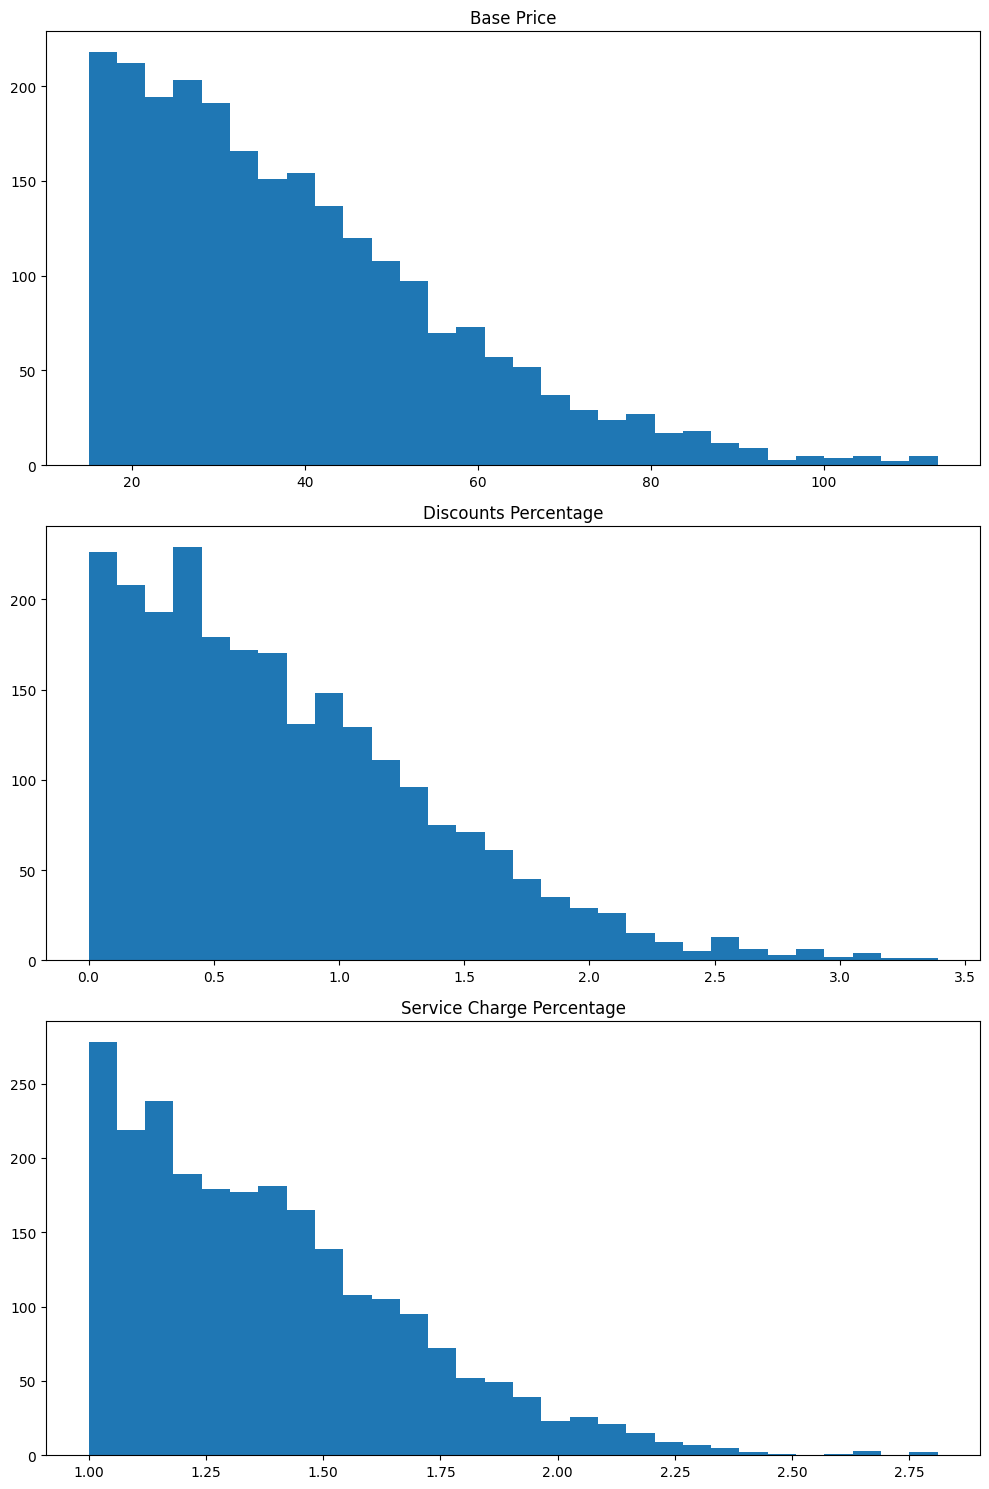

In [13]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Base Price histogram
ax[0].hist(df['Base Price'], bins=30)
ax[0].set_title('Base Price')

# Discounts Percentage histogram
ax[1].hist(df['Discounts percentage'], bins=30)
ax[1].set_title('Discounts Percentage')

# Service Charge Percentage histogram
ax[2].hist(df['Service charge percentage'], bins=30)
ax[2].set_title('Service Charge Percentage')

# Add some space between the plots
fig.tight_layout()

# Display the plots
plt.show()


From the Dist plot we can see the important features such as **Base Price**, **Service charge percentage** and **Discount percentage** show right hand skewed
distribution,

In [14]:
df.dtypes

Product rating               float64
Transaction number           float64
Customer ID                  float64
Seller ID                    float64
Base Price                   float64
Discounts percentage         float64
Service charge percentage    float64
Product ID                   float64
Total amount per unit        float64
Product score 1              float64
Product score 2              float64
Quantity                     float64
Product category              object
Product subcategory           object
Transaction date              object
dtype: object


Converting the the object dtype **Transaction date** feature to Datetime format. so, that we extract feautre such as monthly information.



In [15]:
df['Transaction date']=pd.to_datetime(df['Transaction date'],format='%d-%m-%Y')
df['month']=df['Transaction date'].dt.month
df=df.set_index(df['Transaction date'])
df.drop(columns='Transaction date',inplace=True)


In [16]:
df

,Product rating,Transaction number,Customer ID,Seller ID,Base Price,Discounts percentage,Service charge percentage,Product ID,Total amount per unit,Product score 1,Product score 2,Quantity,Product category,Product subcategory,month
Transaction date,,,,,,,,,,,,,,,
2022-05-10,9.0,975229.0,265758.0,928785.0,32.11,1.21,1.12,96.0,32.081101,66.165,2.95,8.0,C2,SC2,5
2022-06-15,1.0,268708.0,598533.0,113357.0,17.97,0.17,1.19,99.0,18.153294,28.955,0.15,18.0,C2,SC2,6
2022-04-09,3.0,696757.0,289082.0,702163.0,30.66,0.60,1.69,95.0,30.994194,51.990,0.00,3.0,C2,SC2,4
2022-03-06,2.0,277371.0,912988.0,672428.0,100.05,0.63,1.26,37.0,100.680315,154.075,-1.15,5.0,C1,SC2,3
2022-04-28,2.0,133559.0,711463.0,730238.0,17.99,1.68,1.34,40.0,17.928834,30.985,-6.40,10.0,C1,SC2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-18,5.0,500138.0,968630.0,647438.0,77.00,0.32,1.15,319.0,77.639100,125.500,3.40,19.0,C5,SC3,4
2022-05-23,2.0,643545.0,264324.0,593860.0,34.32,1.23,1.45,147.0,34.395504,55.480,-4.15,16.4,C3,SC1,5
2022-04-14,1.0,210493.0,791350.0,642533.0,18.12,0.56,1.66,18.0,18.319320,29.180,-1.80,24.2,C1,SC1,4


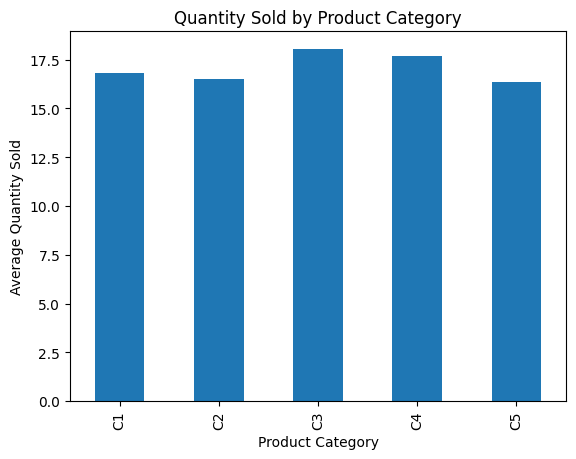

In [17]:
# @title Quantity Sold by Product Category

import matplotlib.pyplot as plt
df.groupby('Product category')['Quantity'].mean().plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Average Quantity Sold')
_ = plt.title('Quantity Sold by Product Category')

Contribution of each category in the overall transaction

In [18]:
import plotly.express as px

# Assuming 'df' is your DataFrame
fig = px.pie(df, names='Product category')
fig.show()


Contribution of sub-categories in the overall transactions

In [19]:
import plotly.express as px

# Assuming 'df' is your DataFrame
fig = px.pie(df, names='Product subcategory')
fig.show()


In [20]:
cat_sales=df.groupby('Product category')['Quantity'].sum().sort_values(ascending=False).reset_index()
px.bar(cat_sales,x='Product category',y='Quantity',title='Quantity Sold by Product Category')

In [21]:
subcat_sales=df.groupby('Product subcategory')['Quantity'].sum().sort_values(ascending=False).reset_index()
px.bar(subcat_sales,x='Product subcategory',y='Quantity',title='Quantity Sold by Product Subcategory')

<Axes: title={'center': 'Monthly Sale Over Six Month Time Horizon '}, xlabel='Transaction date'>

<Figure size 1800x600 with 0 Axes>

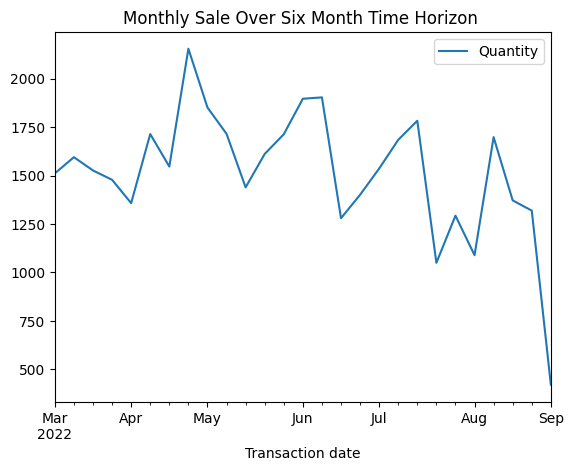

In [22]:
df_ts = df[['Quantity']]
plt.figure(figsize=(18,6))
df_resample = df_ts.resample('W').sum()
df_resample.plot(title='Monthly Sale Over Six Month Time Horizon ')

In [23]:
seller_sales=df.groupby('Seller ID')['Quantity'].sum().sort_values(ascending=False).reset_index()
px.bar(seller_sales,x='Seller ID',y='Quantity',title='Quantity Sold by Seller')

In [24]:
df_qu=df.groupby('Product ID')['Quantity'].sum().reset_index()
df_qu.set_index(df_qu['Product ID'],inplace=True)
df_qu.drop(columns='Product ID',inplace=True)
df_qu=df_qu['Quantity'].sort_values(ascending=False)
df_qu=pd.DataFrame(df_qu)
df_qu.head()

,Quantity
Product ID,
148.0,1068.0
73.0,1033.8
86.0,1021.0
104.0,921.0
82.0,859.0


Each product ID has different base price and product rating assigned to it. Even products with same ID differ in other sales features.

In [25]:
df[df['Product ID']==96]

,Product rating,Transaction number,Customer ID,Seller ID,Base Price,Discounts percentage,Service charge percentage,Product ID,Total amount per unit,Product score 1,Product score 2,Quantity,Product category,Product subcategory,month
Transaction date,,,,,,,,,,,,,,,
2022-05-10,9.0,975229.0,265758.0,928785.0,32.11,1.21,1.12,96.0,32.081101,66.165,2.95,8.0,C2,SC2,5
2022-04-23,6.0,281738.0,608563.0,435856.0,32.90,2.03,2.13,96.0,32.932900,61.350,-4.15,19.0,C1,SC2,4
2022-05-08,6.0,735039.0,635012.0,435856.0,101.48,1.14,1.23,96.0,101.571332,164.220,0.30,20.0,C2,SC2,5
2022-05-23,9.0,703494.0,592081.0,928785.0,47.82,0.96,1.55,96.0,48.102138,89.730,4.20,26.0,C2,SC2,5
2022-08-21,5.0,510205.0,830054.0,791247.0,51.10,1.05,1.91,96.0,51.539460,86.650,-0.25,9.0,C2,SC2,8
2022-07-05,6.0,704062.0,192918.0,435856.0,44.21,0.35,1.57,96.0,44.749362,78.315,4.25,38.0,C2,SC2,7
2022-03-17,5.0,983015.0,780104.0,791247.0,29.87,0.08,1.01,96.0,30.147791,54.805,4.60,15.0,C2,SC2,3
2022-05-29,5.0,208283.0,172928.0,702163.0,24.55,0.67,1.29,96.0,24.702210,46.825,1.65,15.0,C2,SC2,5
2022-05-19,5.0,365598.0,461646.0,702163.0,92.58,1.27,1.10,96.0,92.422614,148.870,-1.35,2.0,C2,SC2,5


# Feature Engineering

In [26]:
df.head()

,Product rating,Transaction number,Customer ID,Seller ID,Base Price,Discounts percentage,Service charge percentage,Product ID,Total amount per unit,Product score 1,Product score 2,Quantity,Product category,Product subcategory,month
Transaction date,,,,,,,,,,,,,,,
2022-05-10,9.0,975229.0,265758.0,928785.0,32.11,1.21,1.12,96.0,32.081101,66.165,2.95,8.0,C2,SC2,5
2022-06-15,1.0,268708.0,598533.0,113357.0,17.97,0.17,1.19,99.0,18.153294,28.955,0.15,18.0,C2,SC2,6
2022-04-09,3.0,696757.0,289082.0,702163.0,30.66,0.60,1.69,95.0,30.994194,51.990,0.00,3.0,C2,SC2,4
2022-03-06,2.0,277371.0,912988.0,672428.0,100.05,0.63,1.26,37.0,100.680315,154.075,-1.15,5.0,C1,SC2,3
2022-04-28,2.0,133559.0,711463.0,730238.0,17.99,1.68,1.34,40.0,17.928834,30.985,-6.40,10.0,C1,SC2,4


Looking for Outlier in the numerical values

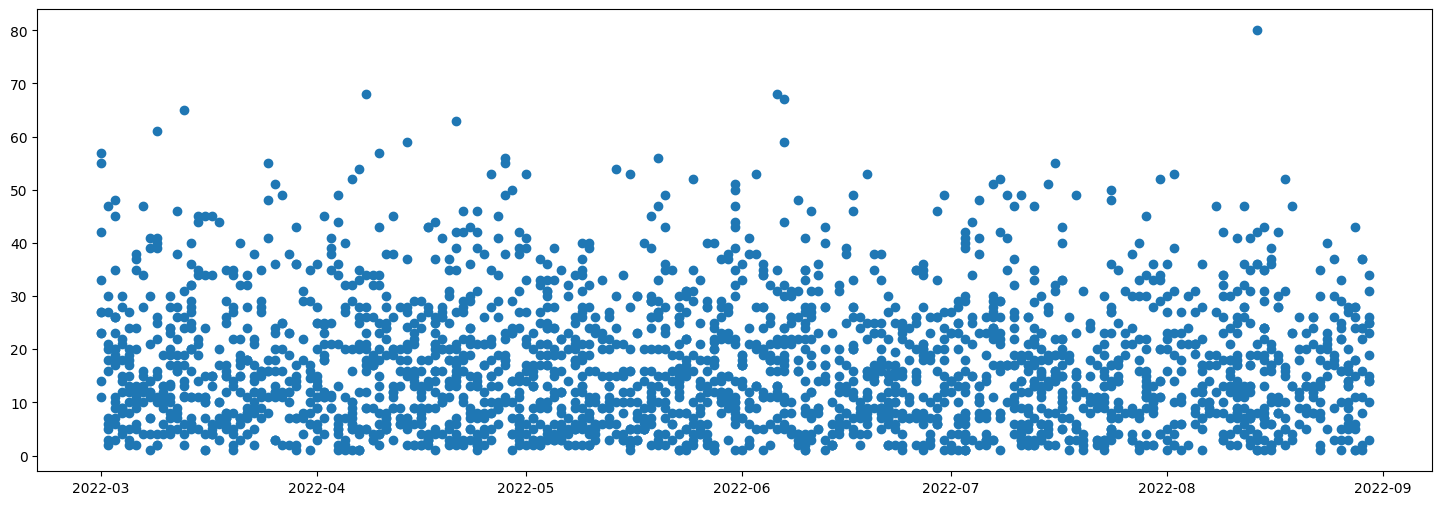

In [27]:
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['Quantity'])

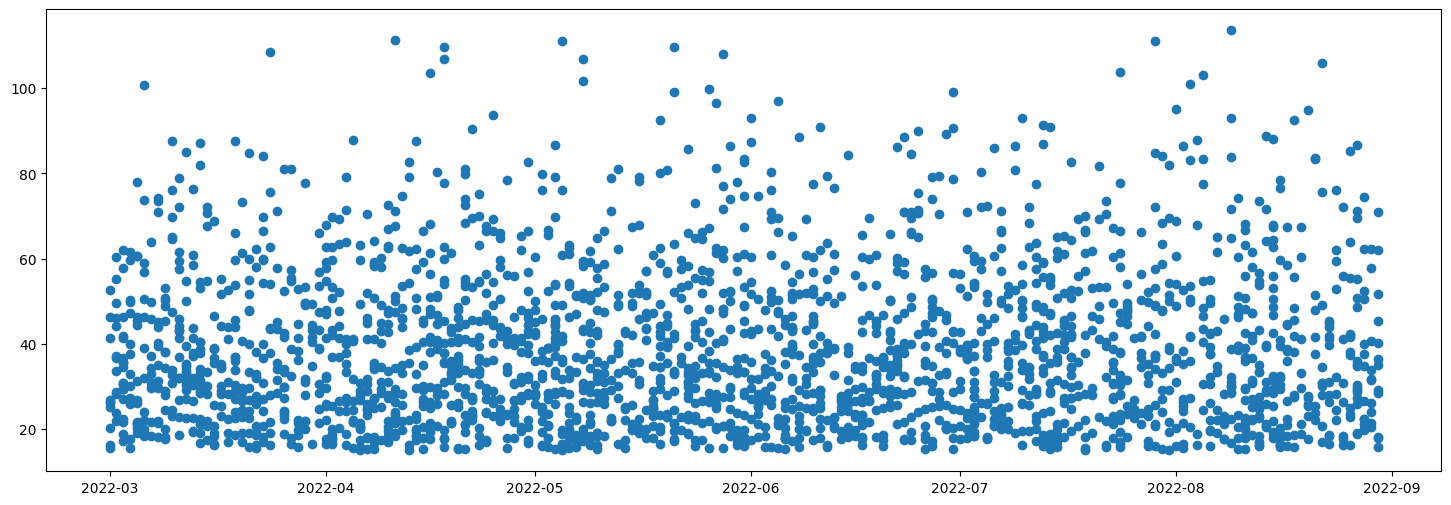

In [28]:
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['Total amount per unit'])

In [29]:
df.describe()

,Product rating,Transaction number,Customer ID,Seller ID,Base Price,Discounts percentage,Service charge percentage,Product ID,Total amount per unit,Product score 1,Product score 2,Quantity,month
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,3.655000,553724.070417,548093.005833,549427.075000,38.912312,0.791992,1.390559,114.230333,39.177525,65.688469,-0.303438,17.055667,5.432083
std,2.049673,261466.992222,261483.930448,217218.808435,18.387035,0.596471,0.296935,76.617996,18.458868,27.894348,3.600757,12.023603,1.665296
min,1.000000,100047.000000,101269.000000,113357.000000,15.030000,0.000000,1.000000,10.000000,15.016680,24.635000,-14.400000,1.000000,3.000000
25%,2.000000,326345.500000,313985.500000,373981.000000,24.435000,0.320000,1.150000,46.000000,24.699081,43.883750,-2.450000,8.000000,4.000000
50%,3.000000,552959.500000,547263.000000,569028.000000,34.945000,0.670000,1.330000,99.000000,35.350911,60.072500,0.050000,15.000000,5.000000
75%,5.000000,782144.500000,774773.500000,709568.000000,49.447500,1.150000,1.570000,166.250000,49.672019,81.570000,2.000000,24.000000,7.000000
max,12.000000,999930.000000,998666.000000,928785.000000,113.140000,3.390000,2.810000,322.000000,113.558618,181.945000,8.950000,80.000000,8.000000


We can from the graph **Base Price', 'Discounts percentage', 'Service charge percentage',
        'Total amount per unit', 'Product score 1',
       'Product score 2** are having outliers. These outliers if not handled properly might pose a problem in the model prediction.
We are handling the outliers by the use of winsorization. It assigns the outlier with values of nearby threshold value. Here we are using 0.05 as lower as well as upper bound.

In [30]:
import numpy as np
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings('ignore')
column=['Base Price', 'Discounts percentage', 'Service charge percentage',
        'Total amount per unit', 'Product score 1',
       'Product score 2']
# Winsorization
for col in column:
  df[col]=winsorize(df[col],limits=[0.05,0.05])


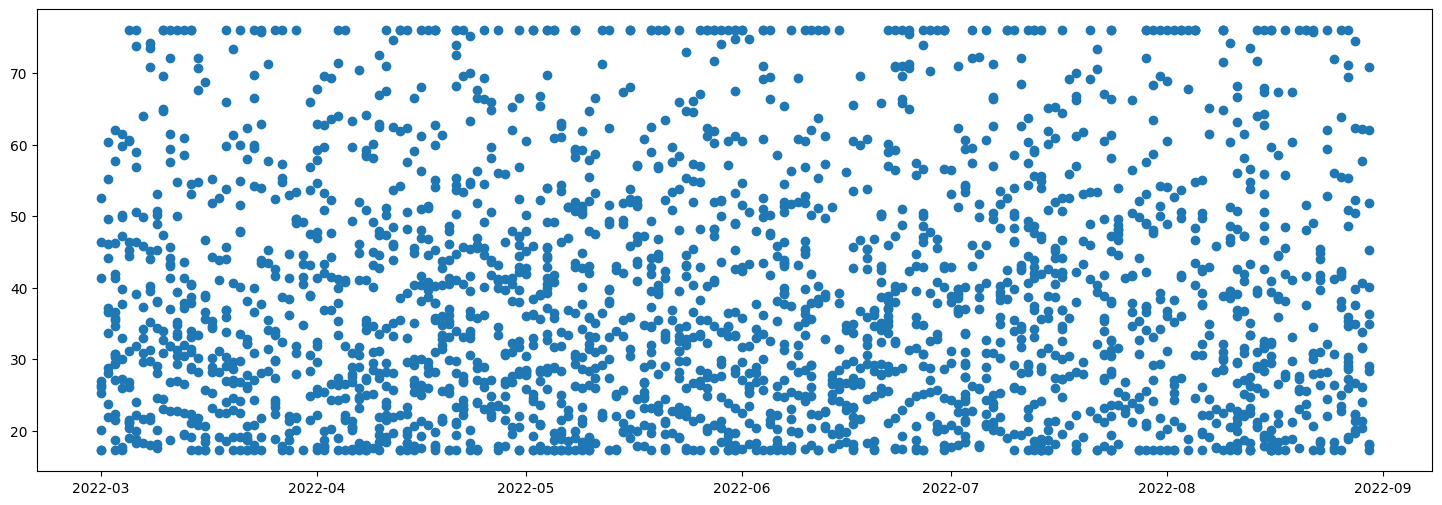

In [31]:
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['Total amount per unit'])

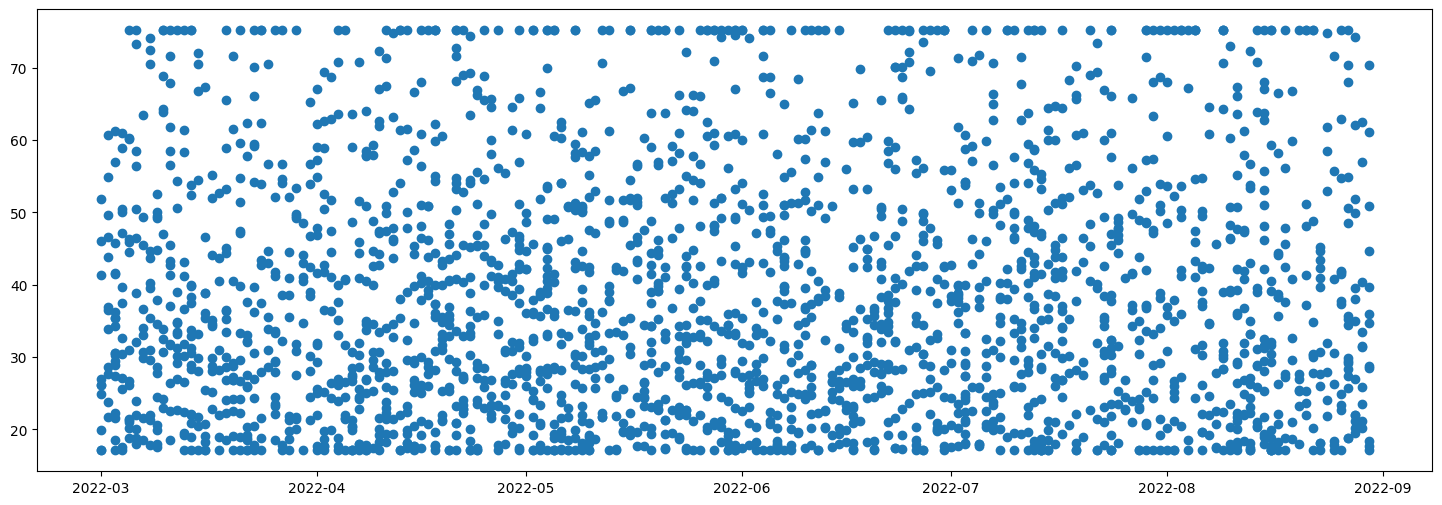

In [32]:
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['Base Price'])

In [33]:
df.head()

,Product rating,Transaction number,Customer ID,Seller ID,Base Price,Discounts percentage,Service charge percentage,Product ID,Total amount per unit,Product score 1,Product score 2,Quantity,Product category,Product subcategory,month
Transaction date,,,,,,,,,,,,,,,
2022-05-10,9.0,975229.0,265758.0,928785.0,32.11,1.21,1.12,96.0,32.081101,66.165,2.95,8.0,C2,SC2,5
2022-06-15,1.0,268708.0,598533.0,113357.0,17.97,0.17,1.19,99.0,18.153294,31.450,0.15,18.0,C2,SC2,6
2022-04-09,3.0,696757.0,289082.0,702163.0,30.66,0.60,1.69,95.0,30.994194,51.990,0.00,3.0,C2,SC2,4
2022-03-06,2.0,277371.0,912988.0,672428.0,75.16,0.63,1.26,37.0,75.971112,120.190,-1.15,5.0,C1,SC2,3
2022-04-28,2.0,133559.0,711463.0,730238.0,17.99,1.68,1.34,40.0,17.928834,31.450,-6.40,10.0,C1,SC2,4


Creating new feature Total amount= **Total amount pe unit * Quantiy**.
We hope this feature will be better for finding the correlation between quantity(Targate) and **total amount per unit** and **Quantity** .

In [34]:
df['Total amount']=(df['Total amount per unit']*df['Quantity'])
df.drop(columns='Total amount per unit',inplace=True)


Creating new feature as **Discounted price** will capture the essence of all the three parent feature i.e. **Base Price, Discounted percentage, Service charge percentage**.

In [35]:
df['Discounted price']=df['Base Price']-df['Discounts percentage']
df['Discounted price']=df['Discounted price']-df['Service charge percentage']
df.drop(columns=['Base Price','Discounts percentage','Service charge percentage'],inplace=True)

In [36]:
df.head()

,Product rating,Transaction number,Customer ID,Seller ID,Product ID,Product score 1,Product score 2,Quantity,Product category,Product subcategory,month,Total amount,Discounted price
Transaction date,,,,,,,,,,,,,
2022-05-10,9.0,975229.0,265758.0,928785.0,96.0,66.165,2.95,8.0,C2,SC2,5,256.648808,29.78
2022-06-15,1.0,268708.0,598533.0,113357.0,99.0,31.450,0.15,18.0,C2,SC2,6,326.759292,16.61
2022-04-09,3.0,696757.0,289082.0,702163.0,95.0,51.990,0.00,3.0,C2,SC2,4,92.982582,28.37
2022-03-06,2.0,277371.0,912988.0,672428.0,37.0,120.190,-1.15,5.0,C1,SC2,3,379.855560,73.27
2022-04-28,2.0,133559.0,711463.0,730238.0,40.0,31.450,-6.40,10.0,C1,SC2,4,179.288340,14.97


Merging previously created data frame and adding new fetaure **Product_Quantity**. This feature calculates the number of **Quantity** sold of each **Product ID**

In [37]:
df=df.merge(df_qu,on='Product ID',how='left')
df = df.rename(columns={'Quantity_x': 'Quantity', 'Quantity_y': 'Product_Quantity'})

Calculating Variance-Inflation-Factor to see if high correlation exist between features. VIF value above 5 to 10 is supposed to have high correlation with other features.

In [38]:
num_col=df.select_dtypes(include=np.number)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(num_col.values,i) for i in range(num_col.shape[1])]
vif['Features']=num_col.columns
vif

,VIF,Features
0,62.115757,Product rating
1,5.057381,Transaction number
2,4.999457,Customer ID
3,6.581974,Seller ID
4,3.584912,Product ID
5,3279.253890,Product score 1
6,2.096971,Product score 2
7,16.056838,Quantity
8,9.643701,month
9,17.552882,Total amount


In [40]:
px.imshow(num_col.corr(),title='Correlation Matrix',aspect='auto',text_auto=True)

Removing some of the feature with high correlation coefficient value.

In [41]:
num_col=num_col.drop(columns=['Product score 1','Product score 2','Discounted price'])

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(num_col.values,i) for i in range(num_col.shape[1])]
vif['Features']=num_col.columns
vif

,VIF,Features
0,3.857238,Product rating
1,4.812225,Transaction number
2,4.749625,Customer ID
3,6.202204,Seller ID
4,3.397587,Product ID
5,7.959317,Quantity
6,8.516512,month
7,6.430768,Total amount
8,3.553048,Product_Quantity


In [43]:
df=pd.concat([num_col,cat_col],axis=1)
df.head()

,Product rating,Transaction number,Customer ID,Seller ID,Product ID,Quantity,month,Total amount,Product_Quantity,Product category,Product subcategory,Transaction date
0,9.0,975229.0,265758.0,928785.0,96.0,8.0,5,256.648808,227.0,C2,SC2,10-05-2022
1,1.0,268708.0,598533.0,113357.0,99.0,18.0,6,326.759292,757.6,C2,SC2,15-06-2022
2,3.0,696757.0,289082.0,702163.0,95.0,3.0,4,92.982582,398.0,C2,SC2,09-04-2022
3,2.0,277371.0,912988.0,672428.0,37.0,5.0,3,379.855560,415.0,C1,SC2,06-03-2022
4,2.0,133559.0,711463.0,730238.0,40.0,10.0,4,179.288340,818.8,C1,SC2,28-04-2022


<Axes: xlabel='Product rating', ylabel='Density'>

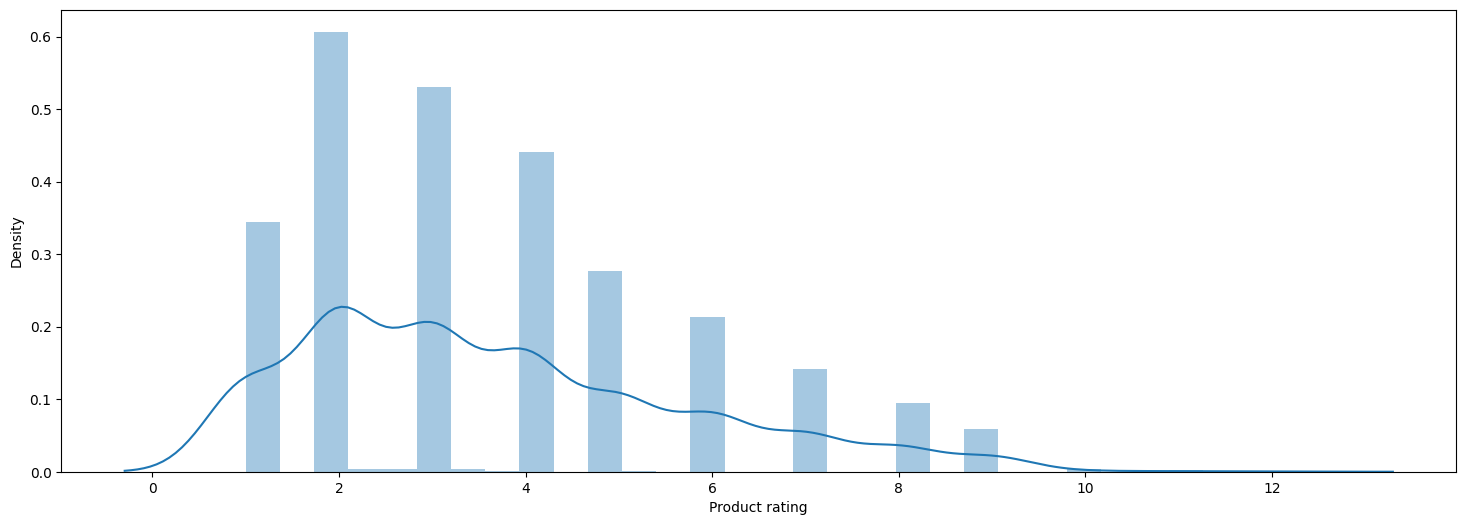

In [44]:
plt.figure(figsize=(18,6))
sns.distplot(df['Product rating'],bins=30,kde=True)

Checking for any negative values in the data.





In [45]:
# Iterate through each column in the DataFrame
for col in num_col.columns:
    # Check if any value in the column is negative
    if (num_col[col] < 0).any():
        print(col)


<Axes: xlabel='Total amount', ylabel='Density'>

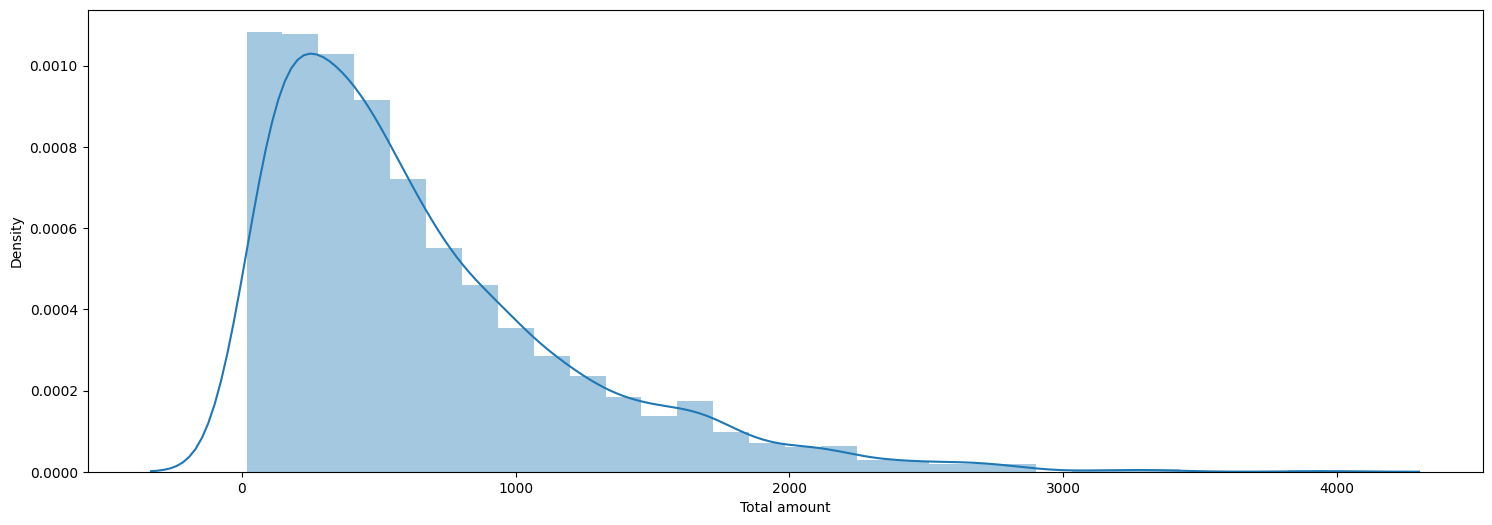

In [46]:
plt.figure(figsize=(18,6))
sns.distplot(df['Total amount'],bins=30,kde=True)

**Total amount** feature is right skewed feature to make it normally distributed. We will perform **Yeo-Jhonsons Transformation**

<Axes: xlabel='Total amount', ylabel='Density'>

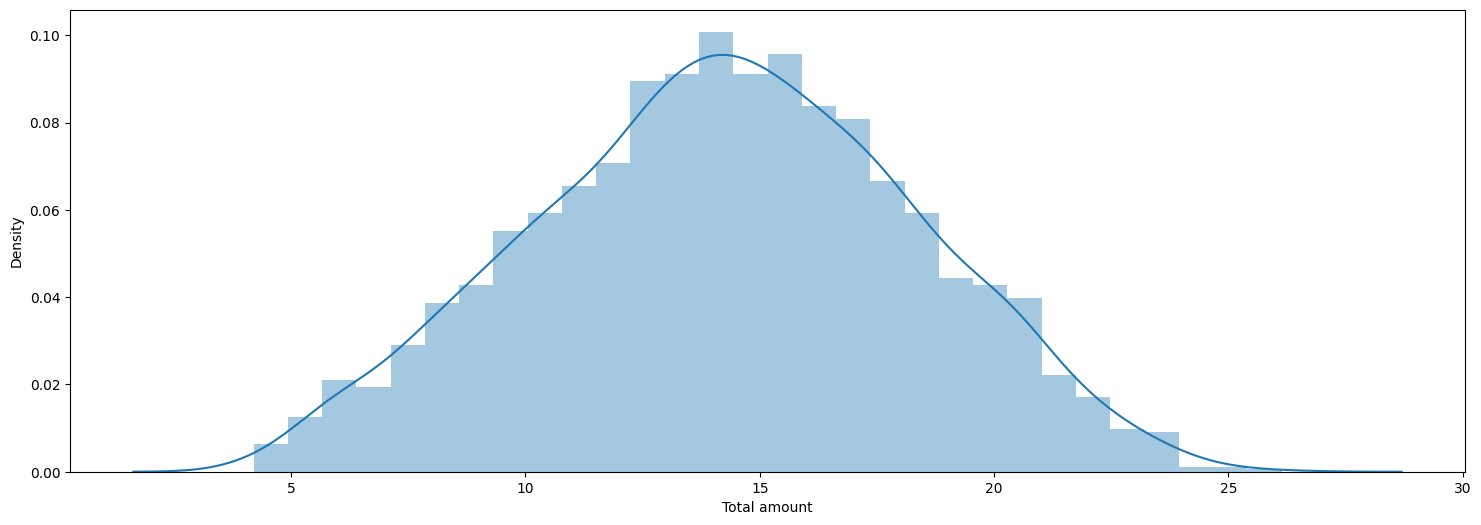

In [47]:
# Apply Yeo-Johnson transformation
from scipy import stats
num_col['Total amount']=stats.yeojohnson(num_col['Total amount'])[0]
plt.figure(figsize=(18,6))
sns.distplot(num_col['Total amount'],bins=30,kde=True)


In [48]:
df=pd.concat([num_col,cat_col],axis=1)
df.head()

,Product rating,Transaction number,Customer ID,Seller ID,Product ID,Quantity,month,Total amount,Product_Quantity,Product category,Product subcategory,Transaction date
0,9.0,975229.0,265758.0,928785.0,96.0,8.0,5,11.595831,227.0,C2,SC2,10-05-2022
1,1.0,268708.0,598533.0,113357.0,99.0,18.0,6,12.530896,757.6,C2,SC2,15-06-2022
2,3.0,696757.0,289082.0,702163.0,95.0,3.0,4,8.213897,398.0,C2,SC2,09-04-2022
3,2.0,277371.0,912988.0,672428.0,37.0,5.0,3,13.142070,415.0,C1,SC2,06-03-2022
4,2.0,133559.0,711463.0,730238.0,40.0,10.0,4,10.304212,818.8,C1,SC2,28-04-2022


<Axes: xlabel='Product rating', ylabel='Density'>

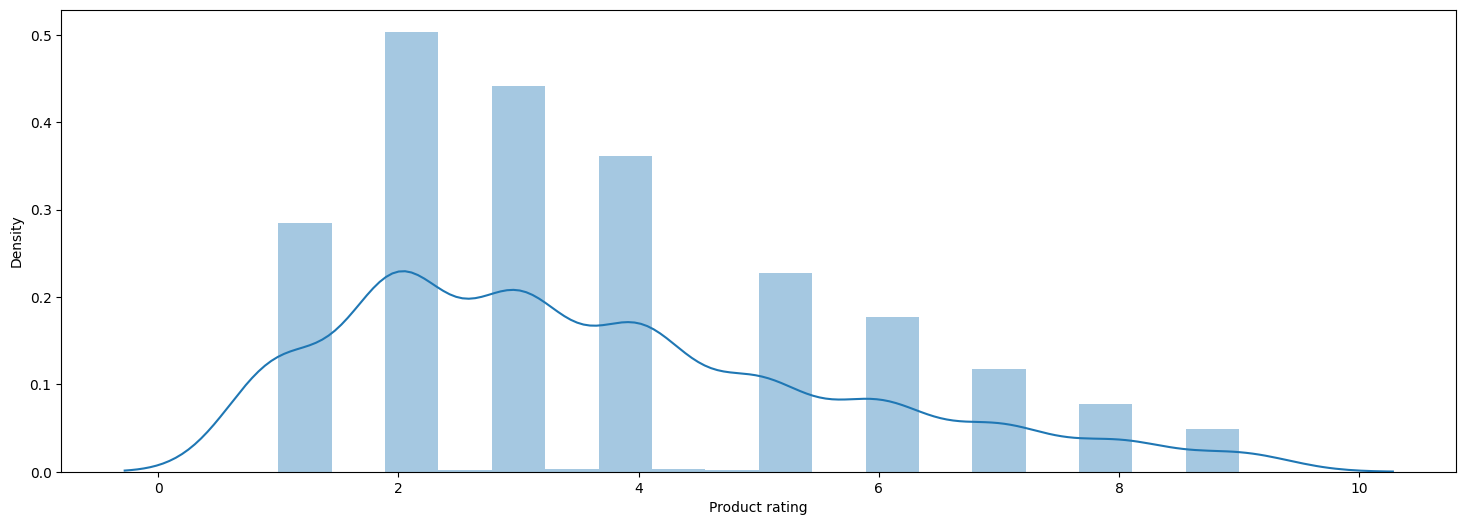

In [49]:

plt.figure(figsize=(18,6))
sns.distplot(df[df['Product rating']<10]['Product rating'],kde=True)


In [50]:
df['Product rating'].value_counts()

Product rating
2.0     534
3.0     467
4.0     385
1.0     303
5.0     241
6.0     188
7.0     125
8.0      83
9.0      52
4.2       3
10.0      3
2.2       2
4.8       2
11.0      2
2.8       2
3.4       2
2.4       1
3.2       1
3.6       1
2.6       1
12.0      1
5.2       1
Name: count, dtype: int64

Mapping the **Quantity** sold w.r.t. **product rating**

In [51]:
rating_means = df.groupby('Product rating')['Quantity'].mean().reset_index()
df['Product rating_encoded']=df['Product rating'].map(rating_means.set_index('Product rating')['Quantity'])

In [53]:
df

,Product rating,Transaction number,Customer ID,Seller ID,Product ID,Quantity,month,Total amount,Product_Quantity,Product category,Product subcategory,Product rating_encoded
Transaction date,,,,,,,,,,,,
10-05-2022,9.0,975229.0,265758.0,928785.0,96.0,8.0,5,11.595831,227.0,C2,SC2,16.230769
15-06-2022,1.0,268708.0,598533.0,113357.0,99.0,18.0,6,12.530896,757.6,C2,SC2,18.563036
09-04-2022,3.0,696757.0,289082.0,702163.0,95.0,3.0,4,8.213897,398.0,C2,SC2,16.534047
06-03-2022,2.0,277371.0,912988.0,672428.0,37.0,5.0,3,13.142070,415.0,C1,SC2,17.226966
28-04-2022,2.0,133559.0,711463.0,730238.0,40.0,10.0,4,10.304212,818.8,C1,SC2,17.226966
...,...,...,...,...,...,...,...,...,...,...,...,...
18-04-2022,5.0,500138.0,968630.0,647438.0,319.0,19.0,4,19.649184,130.0,C5,SC3,16.848133
23-05-2022,2.0,643545.0,264324.0,593860.0,147.0,16.4,5,14.856868,608.4,C3,SC1,17.226966
14-04-2022,1.0,210493.0,791350.0,642533.0,18.0,24.2,4,13.792792,797.6,C1,SC1,18.563036


Creating new feature which showcases the brackets for amount of quantity sold.

In [54]:
df[df['Quantity']>30]

,Product rating,Transaction number,Customer ID,Seller ID,Product ID,Quantity,month,Total amount,Product_Quantity,Product category,Product subcategory,Product rating_encoded
Transaction date,,,,,,,,,,,,
24-03-2022,4.0,907941.0,937840.0,194273.0,211.0,35.0,3,23.371240,112.0,C4,SC1,16.447792
13-03-2022,4.0,173365.0,911835.0,435856.0,254.0,65.0,3,21.815881,116.0,C4,SC3,16.447792
06-03-2022,2.0,866987.0,491196.0,554631.0,218.0,35.0,3,19.342863,436.0,C4,SC1,17.226966
03-07-2022,3.0,874338.0,526252.0,928785.0,37.0,41.0,7,17.674440,415.0,C1,SC2,16.534047
05-05-2022,5.0,684391.0,428436.0,593860.0,195.0,39.0,5,18.284922,233.0,C3,SC3,16.848133
...,...,...,...,...,...,...,...,...,...,...,...,...
03-04-2022,2.0,503595.0,570181.0,495456.0,99.0,35.0,4,20.492706,757.6,C2,SC2,17.226966
30-08-2022,2.0,715306.0,284053.0,647438.0,86.0,34.0,8,15.039214,1021.0,C2,SC1,17.226966
04-04-2022,3.0,885250.0,820154.0,373981.0,37.0,34.0,4,18.308396,415.0,C1,SC2,16.534047


We are using **frequency based** binning where each bin will approximately contain same number of frequency of targetted feature.

In [55]:
#bins_q = pd.IntervalIndex.from_tuples([(0, 10), (10, 20), (20, 30), (30, 40), (40, 80)])
#df['Quantity_range'] = pd.cut(df['Quantity'], bins=bins_q)
bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['Quantity_range'] = pd.qcut(df['Quantity'], q=5, labels=bin_labels)

In [56]:
num_col=df.select_dtypes(include=np.number)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(num_col.values,i) for i in range(num_col.shape[1])]
vif['Features']=num_col.columns
vif



,VIF,Features
0,4.046802,Product rating
1,5.410491,Transaction number
2,5.350364,Customer ID
3,7.284515,Seller ID
4,3.915699,Product ID
5,8.607242,Quantity
6,11.284969,month
7,36.878889,Total amount
8,3.967934,Product_Quantity
9,46.449502,Product rating_encoded


Encoding the categorical columns

In [58]:
df=pd.get_dummies(df,columns=['Quantity_range','Product category','Product subcategory'])

In [59]:
df.columns

Index(['Product rating', 'Transaction number', 'Customer ID', 'Seller ID',
       'Product ID', 'Quantity', 'month', 'Total amount', 'Product_Quantity',
       'Product rating_encoded', 'Quantity_range_Very Low',
       'Quantity_range_Low', 'Quantity_range_Medium', 'Quantity_range_High',
       'Quantity_range_Very High', 'Product category_C1',
       'Product category_C2', 'Product category_C3', 'Product category_C4',
       'Product category_C5', 'Product subcategory_SC1',
       'Product subcategory_SC2', 'Product subcategory_SC3'],
      dtype='object')

In order to bring all of the features on similar scale. we are using generic scaler. Beacuse most of our data is pretty normalied

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df=pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [61]:
x=df.drop(columns= 'Quantity')
y=df['Quantity']

# Fitting Machine Learning Models

In [62]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


# Assume x and y are already defined
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)

# Predict on the test set
y_pred = rf.predict(x_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

# Perform cross-validation
cv_scores = cross_val_score(rf, x, y, cv=5, scoring='r2')
print(f"Cross-Validation R-squared Scores: {cv_scores}")

Mean Squared Error: 0.0853367017725089
R-squared Score: 0.9033575168507222
Cross-Validation R-squared Scores: [0.87654017 0.90660082 0.92060802 0.88923945 0.87632866]


when we are choosing the **Random Forest Regressor** for the future sales quantity. R2 score of the model is about 0.903 which signifies that our model has high accuracy. MSE Score is also very low which implies the difference between the predicted sale and actual sale values is very small.